<a href="https://colab.research.google.com/github/Randasabag/P10/blob/main/P10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation du jeu de données</a>
 
**Partie 2 : Analyse du jeu de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes</a>
 - <a href="#C4">Affichage des informations</a>
 - <a href="#C5">Analyse des doublons</a>
 - <a href="#C6">Analyse des valeurs manquantes</a>


**Partie 3 : Analyse univariée des variables**
 - <a href="#C7"></a>
 - <a href="#C8"></a>
 - <a href="#C9"


**Partie 4 : Analyse bivariée des indicateurs**
 - <a href="#C18">a>

**Partie 5 : Classification** 
 - <a href="#C24">Classification Ascendante Hiérarchique (CAH)</a>
 - <a href="#C25">Analyse en Composantes Principales (PCA)</a>
 - <a href="#C26">K-Means</a>
 - <a href="#C27">Analyse en Composantes Principales (PCA)</a>

# **<font color='indianred'>Partie 1 : Importation des données</font>**

## <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import io
from google.colab import files

## <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [2]:
uploaded = files.upload()

Saving billets.xlsx to billets.xlsx


In [3]:
from google.colab import files
functions = files.upload()

Saving functions.py to functions.py


In [641]:
#Billets
df_billets=pd.read_excel(io.BytesIO(uploaded['billets.xlsx'])) 
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# **<font color='indianred'>Partie 2 : Analyse du jeu de données</font>**

## <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes</font></a>

In [642]:
#nombre de lignes et colonnes
print('Billets',df_billets.shape)

Billets (1500, 7)


## <a name="C4"><font color='LightSeaGreen'>Affichage des informations</font></a>

In [643]:
print('Table billets')
df_billets.info()

Table billets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


###<font color='purple'>Encodage</font>

In [644]:
#renommage : is_gunuine en nature
df_billets=df_billets.rename(columns={'is_genuine':'nature'})

In [645]:
#Encodage transforme les variables qualitatives True et False en 1 et 0
from sklearn.preprocessing import LabelEncoder
y = np.array(['True', 'False'])
encoder = LabelEncoder()
df_billets['nature'] = encoder.fit_transform(df_billets['nature'])

In [646]:
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nature        1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [647]:
#donner un nom aux billets
df_billets['code_billet']="b"+(df_billets.index).astype(str)
df_billets=df_billets.set_index('code_billet')
df_billets.head(60)

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b0,1,171.81,104.86,104.95,4.52,2.89,112.83
b1,1,171.46,103.36,103.66,3.77,2.99,113.09
b2,1,172.69,104.48,103.50,4.40,2.94,113.16
b3,1,171.36,103.91,103.94,3.62,3.01,113.51
b4,1,171.73,104.28,103.46,4.04,3.48,112.54
b5,1,172.17,103.74,104.08,4.42,2.95,112.81
b6,1,172.34,104.18,103.85,4.58,3.26,112.81
b7,1,171.88,103.76,104.08,3.98,2.92,113.08
b8,1,172.47,103.92,103.67,4.00,3.25,112.85


In [648]:
df_billets['nature'].value_counts()

1    1000
0     500
Name: nature, dtype: int64

Il y a 1000 vrais billets et 500 faux billets.

###<font color='purple'>Analyse statistique</font>

In [649]:
df_billets.describe()

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [650]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [651]:
detect_doublons(df_billets)

------------------
La table contient 0 doublons.
(0, 7)


Empty DataFrame
Columns: [nature, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []




## <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [652]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    #print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',(df.isna().sum()).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

In [653]:
val_manq(df_billets)

Nombre de valeurs manquantes = 37
Nombre de cellulles totales = 10500
Pourcentage de valeurs manquantes =  0.35 %




Pourcentage de valeurs manquantes par variable/colonne =
 nature           0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
margin_low      37
dtype: int64




# **<font color='indianred'>Partie 3 : Analyse univariée des variables</font>**

## <a name="C11"><font color='LightSeaGreen'>diagonal</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

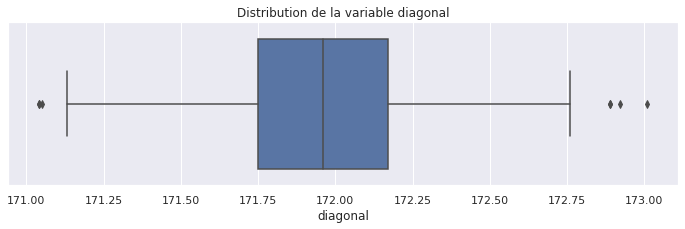

In [654]:
#Représentation la variable diagonal sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["diagonal"], color="b")
plt.title('Distribution de la variable diagonal')
plt.savefig("distribution_diagonal_boxplot.png")
plt.show

In [655]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
def liste_outliers(df, colonne):
  #1er quartile
  q1 = df[colonne].quantile(0.25)
  #3eme quartile
  q3 = df[colonne].quantile(0.75)
  #écart interquatile
  iqr = q3 - q1
  print('Ecart interquatile =', round(iqr,2))
  seuil_min = q1 -(1.5 * iqr) 
  seuil_max = q3 +(1.5 * iqr)
  print('Seuil minimum =', round(seuil_min,2))
  print('Seuil maximum =', round(seuil_max,2))

  #dataframe des outliers
  dfo = df[(df[colonne] < seuil_min) | (df[colonne] > seuil_max)]
  #liste des outliers
  liste_out=(dfo[colonne].tolist())
  print('Nombre doutliers:', len(liste_out))
  print('Liste des outliers :', liste_out)
  print('\n')

In [656]:
#affichage des outliers 
liste_outliers(df_billets, 'diagonal')

Ecart interquatile = 0.42
Seuil minimum = 171.12
Seuil maximum = 172.8
Nombre doutliers: 7
Liste des outliers : [171.04, 172.92, 172.89, 172.89, 171.04, 173.01, 171.05]




In [657]:
l=[171.04, 172.92, 172.89, 172.89, 171.04, 173.01, 171.05]
df_billets[df_billets['diagonal'].isin (l)].sort_values('diagonal')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b729,1,171.04,103.84,103.64,4.22,3.36,112.70
b1142,0,171.04,104.23,104.22,4.87,3.56,111.54
b1388,0,171.05,104.09,104.50,4.72,3.10,112.44
b842,1,172.89,103.77,104.24,4.12,3.01,113.72
b1022,0,172.89,104.03,104.03,6.03,3.00,110.95
b828,1,172.92,103.55,103.94,4.78,3.27,113.55
b1277,0,173.01,104.59,104.31,5.04,3.05,110.91


In [658]:
#df_outdiag=df_billets[df_billets['diagonal'].isin (l)]
#df_outdiag[['nature', 'diagonal']].sort_values('diagonal')

On trouve 7 outliers pour la variable diagonal dont 3 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_left</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

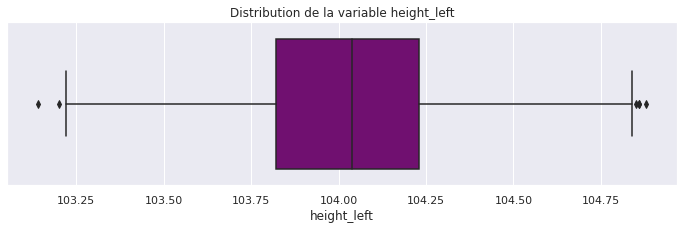

In [659]:
#Représentation la variable height_left sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_left"], color="purple")
plt.title('Distribution de la variable height_left')
plt.savefig("distribution_height_left_boxplot.png")
plt.show

In [660]:
#affichage des outliers 
liste_outliers(df_billets, 'height_left')

Ecart interquatile = 0.41
Seuil minimum = 103.2
Seuil maximum = 104.85
Nombre doutliers: 6
Liste des outliers : [104.86, 103.2, 103.14, 104.88, 104.86, 104.85]




In [661]:
l=[104.86, 103.2, 103.14, 104.88, 104.86, 104.85]
df_billets[df_billets['height_left'].isin (l)].sort_values('height_left')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b292,1,172.09,103.14,103.81,4.88,3.01,113.69
b224,1,172.12,103.20,103.92,4.46,3.26,113.44
b1382,0,171.97,104.85,104.52,5.87,3.56,110.98
b0,1,171.81,104.86,104.95,4.52,2.89,112.83
b1150,0,171.79,104.86,104.34,5.39,3.14,113.02
b1090,0,172.11,104.88,104.10,4.80,3.73,110.78


On trouve 6 outliers pour la variable height_left dont 3 vrais billets et 3 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_right</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

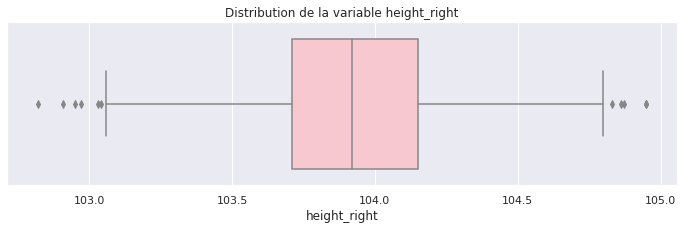

In [662]:
#Représentation la variable height_right sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_right"], color="pink")
plt.title('Distribution de la variable height_right')
plt.savefig("distribution_height_right_boxplot.png")
plt.show

In [663]:
#affichage des outliers 
liste_outliers(df_billets, 'height_right')

Ecart interquatile = 0.44
Seuil minimum = 103.05
Seuil maximum = 104.81
Nombre doutliers: 11
Liste des outliers : [104.95, 103.03, 102.97, 102.95, 102.82, 102.91, 103.04, 104.87, 104.86, 104.83, 104.95]




In [664]:
l=[104.95, 103.03, 102.97, 102.95, 102.82, 102.91, 103.04, 104.87, 104.86, 104.83, 104.95]
df_billets[df_billets['height_right'].isin (l)].sort_values('height_right')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b251,1,171.80,103.26,102.82,NaN,2.95,113.22
b522,1,172.02,104.42,102.91,3.86,3.12,113.43
b193,1,172.35,103.73,102.95,4.49,3.37,112.49
b176,1,171.75,103.63,102.97,4.46,2.77,113.22
b77,1,171.84,104.09,103.03,4.11,2.77,113.18
b761,1,172.16,103.93,103.04,4.14,2.99,113.26
b1331,0,172.32,104.60,104.83,4.84,3.51,112.55
b1321,0,172.29,104.72,104.86,5.71,3.16,112.15
b1199,0,172.03,104.32,104.87,4.49,3.77,111.04


Il y a 11 outliers pour la variable height_right dont 7 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_low</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

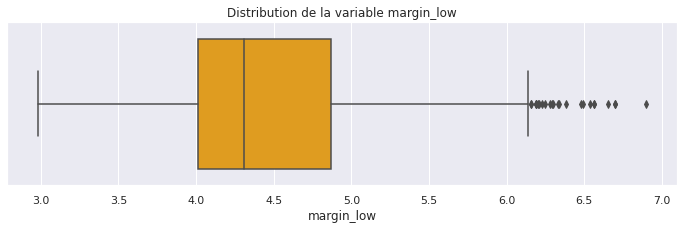

In [665]:
#Représentation la variable margin_low sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_low"], color="orange")
plt.title('Distribution de la variable margin_low')
plt.savefig("distribution_margin_low_boxplot.png")
plt.show

In [666]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_low')

Ecart interquatile = 0.86
Seuil minimum = 2.73
Seuil maximum = 6.15
Nombre doutliers: 24
Liste des outliers : [6.2, 6.7, 6.33, 6.65, 6.21, 6.23, 6.3, 6.56, 6.7, 6.16, 6.34, 6.48, 6.49, 6.9, 6.19, 6.16, 6.28, 6.19, 6.38, 6.25, 6.56, 6.19, 6.54, 6.29]




In [667]:
l=[6.2, 6.7, 6.33, 6.65, 6.21, 6.23, 6.3, 6.56, 6.7, 6.16, 6.34, 6.48, 6.11, 6.14, 6.49, 6.9, 6.19, 6.16, 6.28, 6.19, 6.38, 6.25, 6.56, 6.19, 6.54, 6.29]
df_billets[df_billets['margin_low'].isin (l)].sort_values('margin_low')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b1226,0,171.60,103.90,104.29,6.11,3.55,110.77
b1244,0,171.91,103.80,103.99,6.14,3.32,110.78
b1345,0,171.56,104.17,103.87,6.16,3.38,111.55
b1133,0,171.79,103.99,103.67,6.16,3.52,110.93
b1459,0,171.78,104.31,103.82,6.19,3.25,111.14
b1353,0,171.61,104.04,104.06,6.19,3.08,110.73
b1322,0,172.07,104.50,104.23,6.19,3.07,111.21
b1023,0,172.02,104.26,104.20,6.20,3.58,111.25
b1053,0,171.85,104.52,104.05,6.21,3.43,111.96


On trouve 26 outliers pour la variable margin_low qui sont tous de faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_up</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

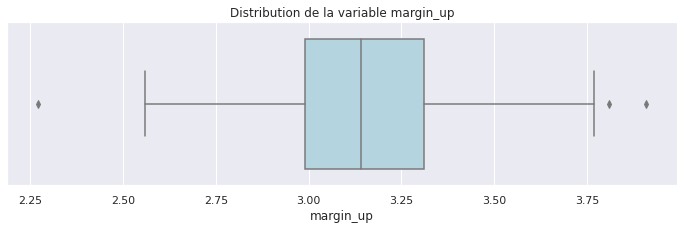

In [668]:
#Représentation la variable margin_up sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_up"], color="lightblue")
plt.title('Distribution de la variable margin_up')
plt.savefig("distribution_margin_up_boxplot.png")
plt.show

In [669]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_up')

Ecart interquatile = 0.32
Seuil minimum = 2.51
Seuil maximum = 3.79
Nombre doutliers: 3
Liste des outliers : [2.27, 3.91, 3.81]




In [670]:
l=[2.27, 3.91, 3.81]
df_billets[df_billets['margin_up'].isin (l)].sort_values('margin_up')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b664,1,172.05,103.70,103.75,5.04,2.27,113.55
b1270,0,171.26,104.22,104.07,4.78,3.81,112.88
b1029,0,171.96,104.29,104.03,6.01,3.91,110.83


On voit 3 outliers pour la variable margin_up dont 1 vrai billet et 2 faux billets.

## <a name="C11"><font color='LightSeaGreen'>length</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

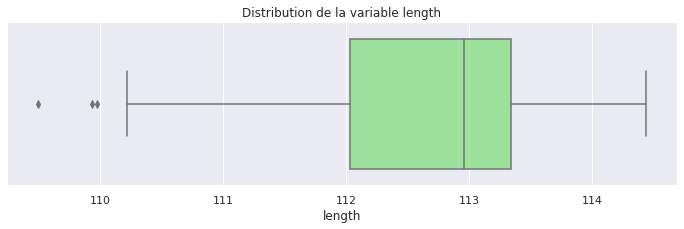

In [671]:
#Représentation la variable length sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["length"], color="lightgreen")
plt.title('Distribution de la variable length')
plt.savefig("distribution_length_boxplot.png")
plt.show

In [672]:
#affichage des outliers 
liste_outliers(df_billets, 'length')

Ecart interquatile = 1.31
Seuil minimum = 110.06
Seuil maximum = 115.3
Nombre doutliers: 3
Liste des outliers : [109.49, 109.97, 109.93]




In [673]:
l=[109.49, 109.97, 109.93]
df_billets[df_billets['length'].isin (l)].sort_values('length')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b1082,0,171.75,103.96,103.83,5.39,3.54,109.49
b1453,0,171.55,104.20,104.49,5.42,3.54,109.93
b1355,0,171.68,103.89,103.70,5.97,3.03,109.97


On voit 3 outliers pour la variable length qui sont tous de faux billets.

# **<font color='indianred'>Partie 4 : Analyse bivariée des variables</font>**

## <a name="C23"><font color='LightSeaGreen'>Matrice de corrélation</font></a>

In [674]:
variables=['diagonal','height_left','height_right','margin_low','margin_up','length']

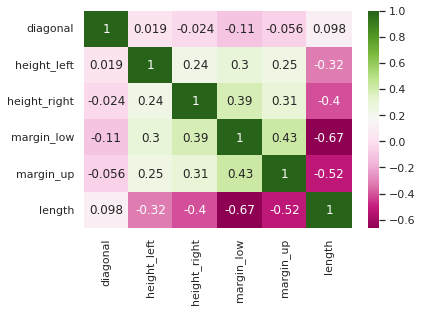

In [675]:
matrix = df_billets[variables].corr()
sns.heatmap(data=matrix, annot=True, cmap='PiYG');

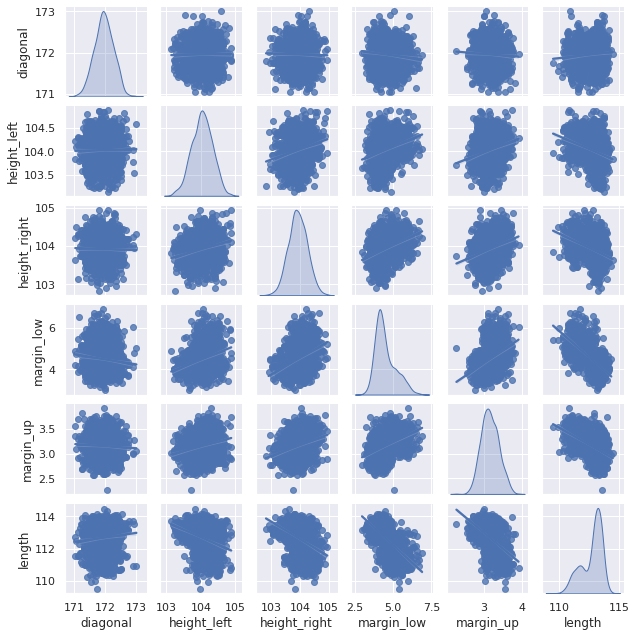

In [676]:
#Visualisation
#sns.pairplot(df_billets, x_vars=['diagonal','height_left','height_right','margin_low','margin_up','length'], y_vars='nature', kind='reg')
sns.pairplot(df_billets, diag_kind="kde",height=1.5, x_vars=variables, y_vars=variables, kind='reg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


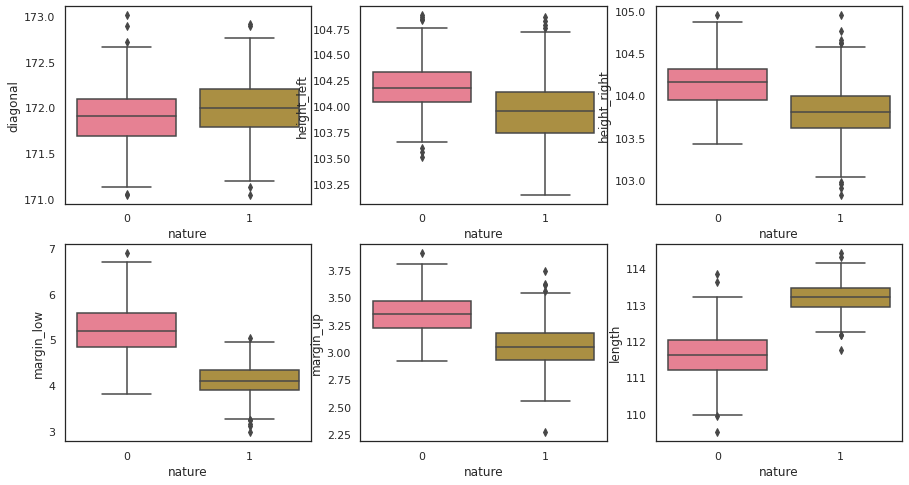

In [677]:
#Comparaison visuelle des clusters par boxplot
plt.figure(figsize=(15, 8))
sns.set(style="white", palette="husl")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_billets, x='nature', y='diagonal')

plt.subplot(232)
sns.boxplot(data=df_billets, x='nature', y='height_left')

plt.subplot(233)
sns.boxplot(data=df_billets, x='nature', y='height_right')

plt.subplot(234)
sns.boxplot(data=df_billets, x='nature', y='margin_low')

plt.subplot(235)
sns.boxplot(data=df_billets, x='nature', y='margin_up')

plt.subplot(236)
sns.boxplot(data=df_billets, x='nature', y='length')

plt.savefig("boxplots.png")
plt.show()

In [678]:
#df_billets[['nature', 'margin_low']].grouby('nature', as_index=False)
#df_prix_cat=df_transcl[['categ', 'price']].groupby('categ', as_index=False).count()
df_billets[['nature', 'margin_low']].groupby(['nature'], as_index=False).count()

,nature,margin_low
0,0,492
1,1,971


Il y a 8 valeurs manquantes parmi les faux billets et 29 valeurs manquantes parmi les vrais billets.

## <a name="C23"><font color='LightSeaGreen'>Création de 2 dataframes : Vrais et Faux billets</font></a>

In [679]:
#création des dataframes pour chaque cluster
Vrais=df_billets[df_billets['nature']==1]
Faux=df_billets[df_billets['nature']==0]

In [680]:
Vrais.isnull().sum().sum()

29

In [681]:
Faux.isnull().sum().sum()

8

# **<font color='indianred'>Partie 5 : Régression Linéaire Multiple</font>**

In [682]:
#Régression Linéaire Multiple sur le dataframe des df_billets
reg_multiV = smf.ols('nature~diagonal+height_left+height_right+margin_low+margin_up+length', data=df_billets).fit()
print(reg_multiV.summary())

                            OLS Regression Results                            
Dep. Variable:                 nature   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1322.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:31:55   Log-Likelihood:                 384.34
No. Observations:                1463   AIC:                            -754.7
Df Residuals:                    1456   BIC:                            -717.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.2646      3.753     -3.268   

## <a name="C23"><font color='LightSeaGreen'>Régression Linéaire Multiple Vrais Billets</font></a>

In [683]:
#Régression Linéaire Multiple sur le dataframe des vrais billets
reg_multiV = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=Vrais).fit()
print(reg_multiV.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.544
Date:                Mon, 22 Aug 2022   Prob (F-statistic):              0.174
Time:                        17:31:55   Log-Likelihood:                -264.37
No. Observations:                 971   AIC:                             540.7
Df Residuals:                     965   BIC:                             570.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.4144      7.928     -1.314   

Coefficient de détermintation R2 : 0.8 %

In [684]:
#matrice de corrélation
Vrais.corr()

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
nature,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagonal,NaN,1.000000,0.077185,0.066015,0.038494,0.024155,0.005580
height_left,NaN,0.077185,1.000000,0.066099,0.006694,0.035709,-0.003301
height_right,NaN,0.066015,0.066099,1.000000,0.037338,-0.003752,0.026995
margin_low,NaN,0.038494,0.006694,0.037338,1.000000,-0.060485,0.038718
margin_up,NaN,0.024155,0.035709,-0.003752,-0.060485,1.000000,0.010471
length,NaN,0.005580,-0.003301,0.026995,0.038718,0.010471,1.000000


La plus forte corrélation de margin_low avec length

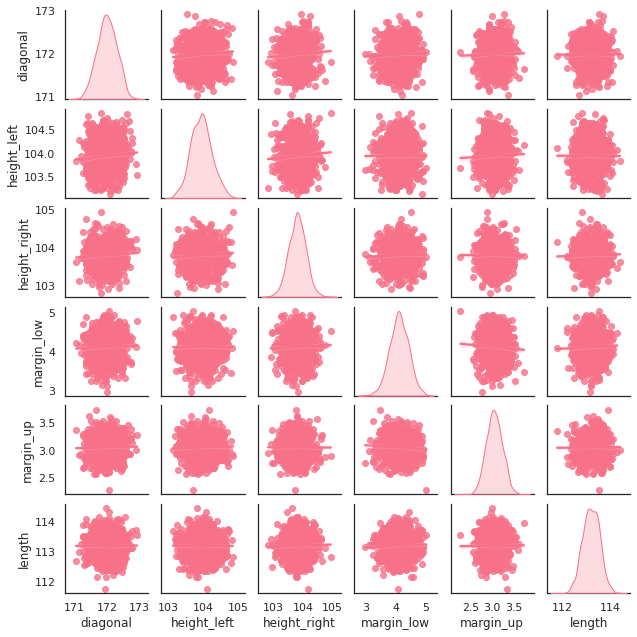

In [685]:
sns.pairplot(Vrais, diag_kind="kde",height=1.5, x_vars=variables, y_vars=variables, kind='reg')

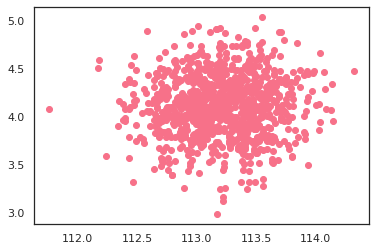

In [686]:
#Forte corrélation entre margin_low et length
plt.scatter(Vrais['length'], Vrais['margin_low'])

In [687]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Dataframe des vrais billets avec les 6 variables
Vrais_var = Vrais[variables]
#train set : sans valeurs manquantes
traindf = Vrais_var[Vrais_var['margin_low'].isnull()==False]
#test set : avec les valeurs manquantes
testdf = Vrais_var[Vrais_var['margin_low'].isnull()==True]
#Colonne margin_low du train set(sans valeurs manquantes)
y = traindf['margin_low']
#suppression de la colonne margin_low dans le train set
traindf.drop("margin_low", axis=1, inplace=True)
#entrainement
model.fit(traindf,y)
#suppression de la colonne margin_low dans le test set
testdf.drop("margin_low", axis=1, inplace=True)
#Prédiction de la variable margin_low dans testdf (liste)
pred = model.predict(testdf).round(decimals=2) 
#intégration des valeurs prédites dans la colonne margin_low dans testdf
testdf.insert(loc = 3, column = 'margin_low', value = pred)
testdf

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,
b72,171.94,103.89,103.45,4.07,3.25,112.79
b99,171.93,104.07,104.18,4.11,3.14,113.08
b151,172.07,103.80,104.38,4.13,3.02,112.93
b197,171.45,103.66,103.80,4.04,3.62,113.27
b241,171.83,104.14,104.06,4.09,3.02,112.36
b251,171.80,103.26,102.82,4.08,2.95,113.22
b284,171.92,103.83,103.76,4.10,3.23,113.29
b334,171.85,103.70,103.96,4.13,3.00,113.36
b410,172.56,103.72,103.51,4.11,3.12,112.95


In [688]:
#dataframe Vrais sans les valeurs manquantes
vr=Vrais_var[Vrais_var['margin_low'].isnull()==False]
#Concaténation du df sans valeurs manquantes avec le df avec les nouvelles valeurs obtenues
Vrais_var=vr.append(testdf)

#Classement par code_billet
Vrais_var=Vrais_var.sort_values(by='code_billet', ascending=True)
Vrais_var

,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,
b0,171.81,104.86,104.95,4.52,2.89,112.83
b1,171.46,103.36,103.66,3.77,2.99,113.09
b10,171.83,104.14,103.62,3.16,3.18,113.22
b100,171.53,104.02,103.87,4.10,3.03,113.32
b101,171.55,103.35,103.69,4.31,3.19,113.42
...,...,...,...,...,...,...
b995,171.66,103.92,103.47,4.26,2.83,113.20
b996,172.16,103.72,103.61,4.30,2.72,113.51
b997,171.78,103.38,104.22,4.23,3.07,113.77


In [689]:
#Plus de valeurs manquantes
Vrais_var[Vrais_var.isnull().any(axis=1)]

,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,


In [690]:
nature=df_billets[[ 'nature']]
nature

,nature
code_billet,
b0,1
b1,1
b2,1
b3,1
b4,1
...,...
b1495,0
b1496,0
b1497,0


In [691]:
Vrais=pd.merge(nature, Vrais_var, left_on='code_billet', right_on='code_billet', how='inner')
Vrais
Vrais[Vrais['nature']==0]

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,


## <a name="C23"><font color='LightSeaGreen'>Régression Linéaire Multiple Faux Billets</font></a>

In [692]:
#Régression Linéaire Multiple sur le dataframe des faux billets
reg_multiF = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=Faux).fit()
print(reg_multiF.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.718
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0195
Time:                        17:32:27   Log-Likelihood:                -399.85
No. Observations:                 492   AIC:                             811.7
Df Residuals:                     486   BIC:                             836.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.2920     20.068      1.011   

Coefficient de détermination R2 : 2.7%

In [693]:
Faux=Faux[variables]
Faux.corr()

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.076488,0.004048,-0.064840,0.046421,-0.070610
height_left,0.076488,1.000000,0.089310,0.037827,-0.015155,0.015004
height_right,0.004048,0.089310,1.000000,-0.004271,0.068229,0.018397
margin_low,-0.064840,0.037827,-0.004271,1.000000,-0.142456,-0.030594
margin_up,0.046421,-0.015155,0.068229,-0.142456,1.000000,-0.043743
length,-0.070610,0.015004,0.018397,-0.030594,-0.043743,1.000000


La plus forte corrélation de margin_low avec height_left

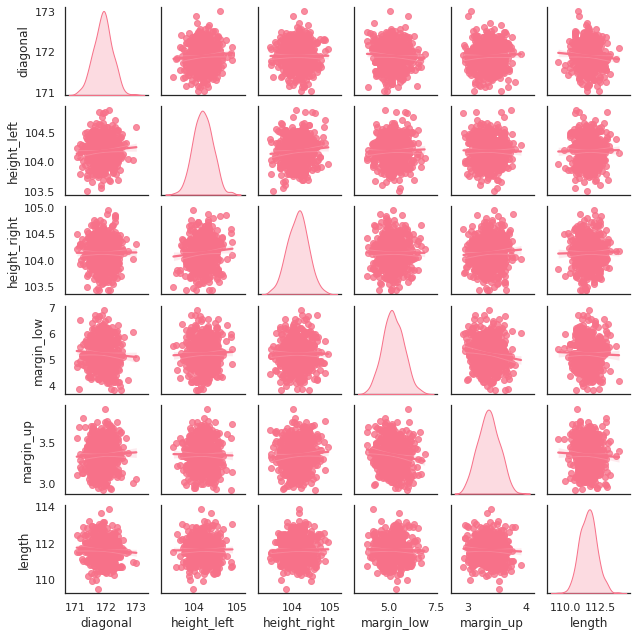

In [694]:
sns.pairplot(Faux, diag_kind="kde",height=1.5, x_vars=variables, y_vars=variables, kind='reg')

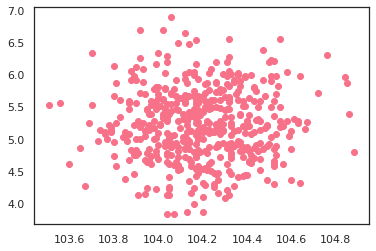

In [695]:
#Forte corrélation entre margin_low et length
plt.scatter(Faux['height_left'], Faux['margin_low'])

In [696]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Dataframe des faux billets avec les 6 variables
Faux_var = Faux[variables]
#train set : sans valeurs manquantes
traindf = Faux_var[Faux_var['margin_low'].isnull()==False]
#test set : avec les valeurs manquantes
testdf = Faux_var[Faux_var['margin_low'].isnull()==True]
#Colonne margin_low du train set(sans valeurs manquantes)
y = traindf['margin_low']
#suppression de la colonne margin_low dans le train set
traindf.drop("margin_low", axis=1, inplace=True)
#entrainement
model.fit(traindf,y)
#suppression de la colonne margin_low dans le test set
testdf.drop("margin_low", axis=1, inplace=True)
#Prédiction de la variable margin_low dans testdf (liste)
pred = model.predict(testdf).round (decimals=2) 
#intégration des valeurs prédites dans la colonne margin_low dans testdf
testdf.insert(loc = 3, column = 'margin_low', value = pred)
testdf

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,
b1076,171.57,104.27,104.44,5.32,3.21,111.87
b1121,171.40,104.38,104.19,5.35,3.17,112.39
b1176,171.59,104.05,103.94,5.40,3.02,111.29
b1303,172.17,104.49,103.76,5.41,2.93,111.21
b1315,172.08,104.15,104.17,5.14,3.40,112.29
b1347,171.72,104.46,104.12,5.20,3.61,110.31
b1435,172.66,104.33,104.41,5.06,3.56,111.47
b1438,171.90,104.28,104.29,5.28,3.24,111.49


In [697]:
#dataframe Faux sans les valeurs manquantes
fx=Faux_var[Faux_var['margin_low'].isnull()==False]
#Concaténation
Faux_var=fx.append(testdf)

#Classement par code_billet
Faux_var=Faux_var.sort_values(by='code_billet', ascending=True)
Faux_var

,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,
b1000,172.28,103.95,103.91,4.78,3.31,111.40
b1001,171.92,103.86,104.30,4.96,3.13,111.29
b1002,171.59,104.14,104.38,4.97,3.47,111.22
b1003,172.02,104.33,104.33,5.19,3.21,111.99
b1004,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...
b1495,171.75,104.38,104.17,4.42,3.09,111.28
b1496,172.19,104.63,104.44,5.27,3.37,110.97
b1497,171.80,104.01,104.12,5.51,3.36,111.95


In [698]:
#Plus de valeurs manquantes
Faux_var[Faux_var.isnull().any(axis=1)]

,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,


In [699]:
Faux=pd.merge(nature, Faux_var, left_on='code_billet', right_on='code_billet', how='inner')
Faux

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b1000,0,172.28,103.95,103.91,4.78,3.31,111.40
b1001,0,171.92,103.86,104.30,4.96,3.13,111.29
b1002,0,171.59,104.14,104.38,4.97,3.47,111.22
b1003,0,172.02,104.33,104.33,5.19,3.21,111.99
b1004,0,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
b1495,0,171.75,104.38,104.17,4.42,3.09,111.28
b1496,0,172.19,104.63,104.44,5.27,3.37,110.97
b1497,0,171.80,104.01,104.12,5.51,3.36,111.95


In [700]:
df_billets_final=Vrais.append(Faux)
df_billets_final

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b0,1,171.81,104.86,104.95,4.52,2.89,112.83
b1,1,171.46,103.36,103.66,3.77,2.99,113.09
b2,1,172.69,104.48,103.50,4.40,2.94,113.16
b3,1,171.36,103.91,103.94,3.62,3.01,113.51
b4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
b1495,0,171.75,104.38,104.17,4.42,3.09,111.28
b1496,0,172.19,104.63,104.44,5.27,3.37,110.97
b1497,0,171.80,104.01,104.12,5.51,3.36,111.95


In [701]:
df_billets_final[df_billets_final.isnull().any(axis=1)]

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,


# **<font color='indianred'>Partie 7 : Classification Supervisée</font>**

## <a name="C27"><font color='LightSeaGreen'>Création de X et y</font></a>

In [702]:
X = df_billets_final.drop('nature', axis=1)
y = df_billets_final['nature']

In [703]:
y

code_billet
b0       1
b1       1
b2       1
b3       1
b4       1
        ..
b1495    0
b1496    0
b1497    0
b1498    0
b1499    0
Name: nature, Length: 1500, dtype: int64

## <a name="C27"><font color='LightSeaGreen'>Test train split</font></a>

In [704]:
from sklearn.model_selection import train_test_split
#random_state=42 est utilisé pour avoir le meme test set à chaque execution du code
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
y_test

code_billet
b1116    0
b1368    0
b422     1
b413     1
b451     1
        ..
b983     1
b799     1
b1265    0
b1150    0
b824     1
Name: nature, Length: 300, dtype: int64

In [705]:
print(f"Forme de X_train : {X_train.shape} et forme de y_train : {y_train.shape}")
print(f"Forme de X_train : {X_test.shape} et forme de y_train : {y_test.shape}")

Forme de X_train : (1200, 6) et forme de y_train : (1200,)
Forme de X_train : (300, 6) et forme de y_train : (300,)


## <a name="C27"><font color='LightSeaGreen'>Modélisation</font></a>

###<font color='purple'>Dummy Classifier</font>

In [706]:
#On va utiliser l'algorithme le plus simple pour avoir un score de base et le comparer avec celui d'autres algos
from sklearn.dummy import DummyClassifier
#La classe la plus fréquente
estimator=DummyClassifier(strategy="most_frequent")
estimator.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [707]:
y_pred=estimator.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [708]:
pd.Series(y_pred).value_counts()

1    300
dtype: int64

In [709]:
y_test.value_counts(normalize=True).round(2)

1    0.63
0    0.37
Name: nature, dtype: float64

La classe 1 est beaucoup plus fréquente que la classe 0.

In [710]:
y_test.values

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [711]:
def score(estimator) :
  train_score = estimator.score(X_train,y_train).round(2)
  test_score = estimator.score(X_test,y_test).round(2)

  print(f"Score du train set : {train_score} Score du test set : {test_score}")

In [712]:
score(estimator)

Score du train set : 0.68 Score du test set : 0.63


In [713]:
from sklearn.metrics import confusion_matrix

def confusion(y_test, y_pred) :
  mat=confusion_matrix(y_test, y_pred)
  mat=pd.DataFrame(mat)
  mat.columns=[f"valeurs_prédites_{i}" for i in mat.columns]
  mat.index = [f"vraies_valeurs_{i}" for i in mat.index]

  return (mat)

In [714]:
confusion(y_test, y_pred)

,valeurs_prédites_0,valeurs_prédites_1
vraies_valeurs_0,0,110
vraies_valeurs_1,0,190


###<font color='purple'>Régression Logistique</font>

In [715]:
#On va utiliser l'algorithme de la régression logistique
from sklearn.linear_model import LogisticRegression
#La classe la plus fréquente
estimator=LogisticRegression(solver="liblinear")
estimator.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [716]:
y_pred=estimator.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [717]:
y_proba=estimator.predict_proba(X_test).round(2)

In [718]:
score(estimator)
confusion(y_test, y_pred)

Score du train set : 0.99 Score du test set : 0.99


,valeurs_prédites_0,valeurs_prédites_1
vraies_valeurs_0,107,3
vraies_valeurs_1,0,190


In [719]:
#fonction qui détecte la nature du billet dont les dimensions sont entrées en paramètres 
#(diagonal	height_left	height_right	margin_low	margin_up	length)
def nature_billet(estimator, diagonal, height_left, height_right, margin_low, margin_up, length):
  x = np.array([diagonal, height_left, height_right, margin_low, margin_up, length]).reshape(1, 6)
  print(f"Prédiction de la nature du billet {estimator.predict(x)}")
  print(f"Probabilité de la prédiction de la nature du billet {estimator.predict_proba(x)}")

In [720]:
nature_billet(estimator, diagonal=180, height_left=104, height_right=103, margin_low=4.5, margin_up=3, length=100)

Prédiction de la nature du billet [0]
Probabilité de la prédiction de la nature du billet [[1.00000000e+00 9.87211709e-21]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# **<font color='indianred'>Partie 6 : Classification non supervisée</font>**

## <a name="C27"><font color='LightSeaGreen'>KMEANS</font></a>

###<font color='purple'>Centrage et Réduction</font>

In [721]:
from sklearn import decomposition, preprocessing
# préparation des données pour le clustering
X = df_billets_final[variables]
billets = df_billets_final.index
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
billets

Index(['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       ...
       'b1490', 'b1491', 'b1492', 'b1493', 'b1494', 'b1495', 'b1496', 'b1497',
       'b1498', 'b1499'],
      dtype='object', name='code_billet', length=1500)

###<font color='purple'>Coefficient de silhouette</font>

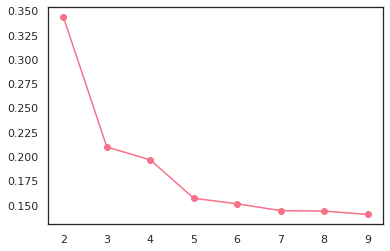

In [722]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 clusters pour tester toutes les possibilités de k
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('silhouette.png')
plt.show()

Le coefficient de silhouette nous indique une valeur de k=2.

###<font color='purple'>Méthode du coude</font>

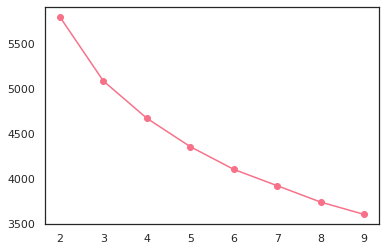

In [723]:
#Méthode du coude
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inerties, marker='o')

plt.savefig('coude.png')
plt.show()

Pas d'indication particulière sur le nombre de clusters à choisir

###<font color='purple'>Algorithme du Kmeans</font>

In [724]:
#Algorithme du Kmeans 
from sklearn.cluster import KMeans

# Création du modèle k-means 
kmeans = KMeans(n_clusters=2, n_init=20, init='k-means++', random_state=1)
kmeans.fit(X_scaled)

# Détermine à quel cluster appartient chaque point (kmeans.labels_)
clusters =  kmeans.predict(X_scaled)
clusters

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [746]:
kmeans.inertia_

5801.366080963957

In [725]:
#nombre d'individus dans chaque cluster
import numpy
numpy.unique(kmeans.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([ 496, 1004]))

###<font color='purple'>Ajout de la colonne numéro de cluster </font>

In [726]:
#Ajout d'une nouvelle colonne qui affecte à chaque billet un numéro de cluster
df_km=df_billets_final[variables].copy()
df_km['nocl'] = kmeans.labels_
df_km

,diagonal,height_left,height_right,margin_low,margin_up,length,nocl
code_billet,,,,,,,
b0,171.81,104.86,104.95,4.52,2.89,112.83,0
b1,171.46,103.36,103.66,3.77,2.99,113.09,1
b2,172.69,104.48,103.50,4.40,2.94,113.16,1
b3,171.36,103.91,103.94,3.62,3.01,113.51,1
b4,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...
b1495,171.75,104.38,104.17,4.42,3.09,111.28,0
b1496,172.19,104.63,104.44,5.27,3.37,110.97,0
b1497,171.80,104.01,104.12,5.51,3.36,111.95,0


In [727]:
#df_km=df_km.reset_index()

###<font color='purple'>Affichage des billets de chaque cluster</font>

In [728]:
#Dataframe de chaque cluster
clusterkm0=df_km[df_km['nocl']==0]
clusterkm1=df_km[df_km['nocl']==1]
clusterkm1.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,nocl
code_billet,,,,,,,
b1,171.46,103.36,103.66,3.77,2.99,113.09,1
b2,172.69,104.48,103.50,4.40,2.94,113.16,1
b3,171.36,103.91,103.94,3.62,3.01,113.51,1
b4,171.73,104.28,103.46,4.04,3.48,112.54,1
b5,172.17,103.74,104.08,4.42,2.95,112.81,1


In [729]:
print('Cluster 0 :', 'Nombre de billets:', len(clusterkm0), clusterkm0.index.unique())
print('Cluster 1 :', 'Nombre de billets:', len(clusterkm1), clusterkm1.index.unique())

Cluster 0 : Nombre de billets: 496 Index(['b0', 'b253', 'b341', 'b580', 'b626', 'b669', 'b724', 'b728', 'b743',
       'b946',
       ...
       'b1490', 'b1491', 'b1492', 'b1493', 'b1494', 'b1495', 'b1496', 'b1497',
       'b1498', 'b1499'],
      dtype='object', name='code_billet', length=496)
Cluster 1 : Nombre de billets: 1004 Index(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10',
       ...
       'b1103', 'b1104', 'b1122', 'b1160', 'b1267', 'b1362', 'b1383', 'b1407',
       'b1412', 'b1482'],
      dtype='object', name='code_billet', length=1004)


###<font color='purple'>Visualisation des clusters par variable</font>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


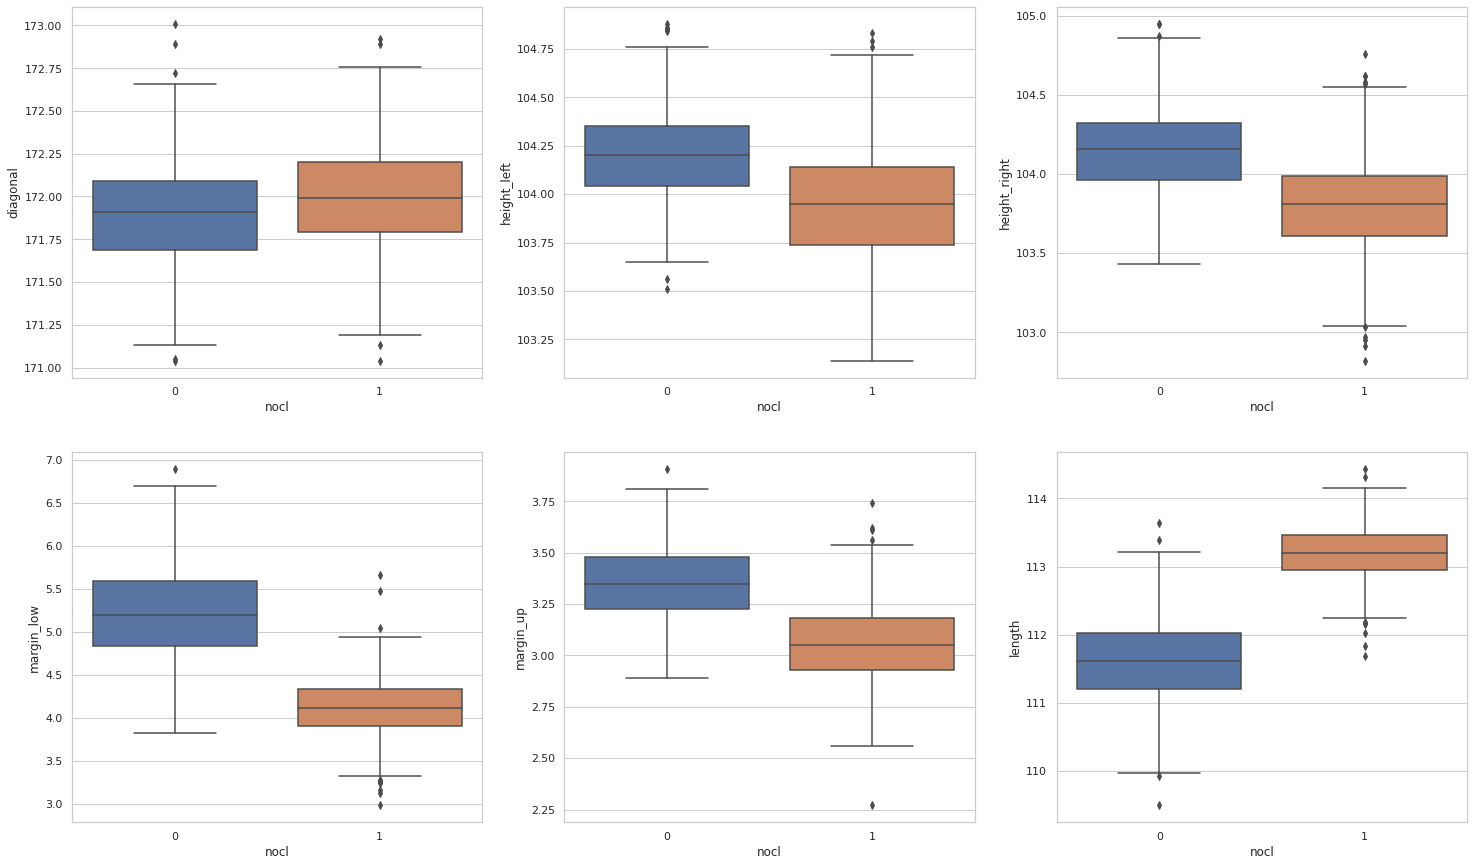

In [730]:
#Comparaison visuelle des clusters par boxplot
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_km, x='nocl', y='diagonal')

plt.subplot(232)
sns.boxplot(data=df_km, x='nocl', y='height_left')

plt.subplot(233)
sns.boxplot(data=df_km, x='nocl', y='height_right')

plt.subplot(234)
sns.boxplot(data=df_km, x='nocl', y='margin_low')

plt.subplot(235)
sns.boxplot(data=df_km, x='nocl', y='margin_up')

plt.subplot(236)
sns.boxplot(data=df_km, x='nocl', y='length')

plt.savefig("boxplots.png")
plt.show()

Caractéristiques des VRAIS / FAUX BILLETS :
*   Les *faux* billets ont une ***hauteur*** (droite/gauche) et une ***marge*** (bas/haut) plus **grandes** que les vrais billets
*   Les *faux* billets ont une **longueur** plus **petite** que celles des *vrais* billets
*   Les *faux* billets ont une **diagonale** un peu plus petite que celles des *vrais* billets


###<font color='purple'>Centroides</font>

In [731]:
#Centroïdes des 2 clusters dans la forme centrée réduite
centroids = kmeans.cluster_centers_
df_cent=pd.DataFrame(centroids, columns=df_billets_final[variables].columns).round(decimals = 2) 
df_cent = df_cent[variables]
df_cent

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.19,0.57,0.71,1.12,0.86,-1.20
1,0.10,-0.28,-0.35,-0.55,-0.43,0.59


###<font color='purple'>ClusterMap</font>

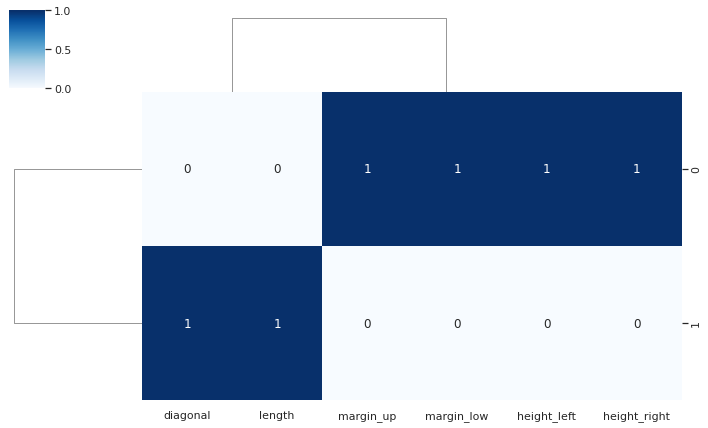

In [732]:
#Clustermap entre clusters et variables
sns.clustermap(df_cent, figsize=(10, 6), annot=True, standard_scale=1, cmap='Blues')
plt.savefig("clustermap.png")
plt.show()

## <a name="C27"><font color='LightSeaGreen'>Analyse en Composantes Principales (PCA)</font></a>

###<font color='purple'>Visualisation des clusters et variables sur un plan à 2 dimensions</font>

In [733]:
#df_billets_final=df_billets_final[variables]

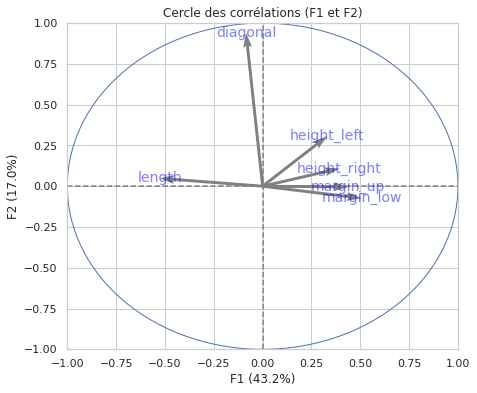

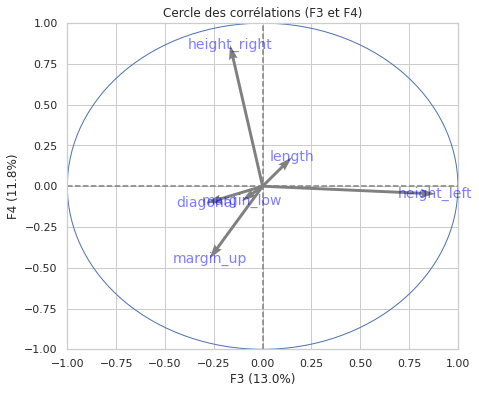

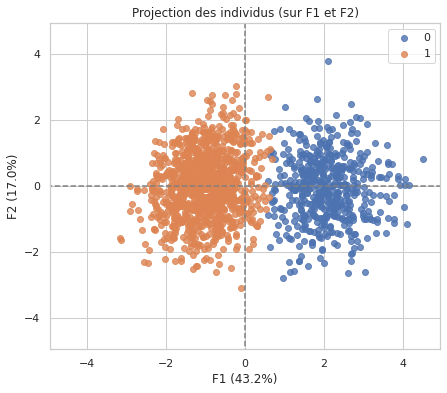

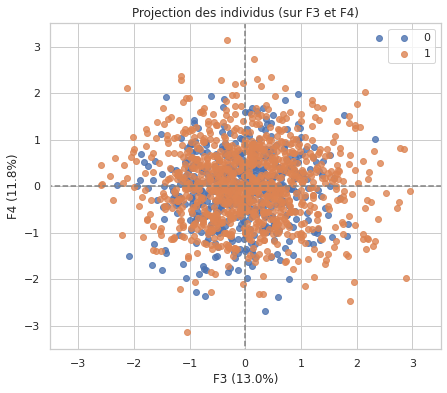

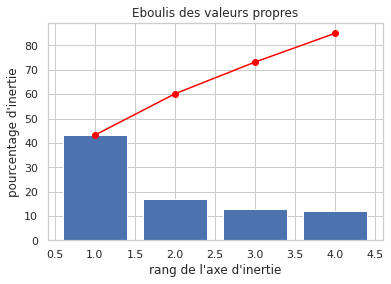

<Figure size 432x288 with 0 Axes>

In [734]:
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing

n_comp=4

# Création du PCA pour réduire les données à 2 dimensions pour la visualisation
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
from functions import display_circles
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(df_billets_final[variables].columns))

# Projection des individus (nouvel espace vectoriel)
X_projected = pca.transform(X_scaled)

# Affiche un scatter plot des points des data dans le nouvel espace vectoriel
from functions import display_factorial_planes
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels=None, illustrative_var = clusters, alpha = 0.8)

# Eboulis des valeurs propres
from functions import display_scree_plot
display_scree_plot(pca)

plt.savefig("PCA.png")
plt.show()

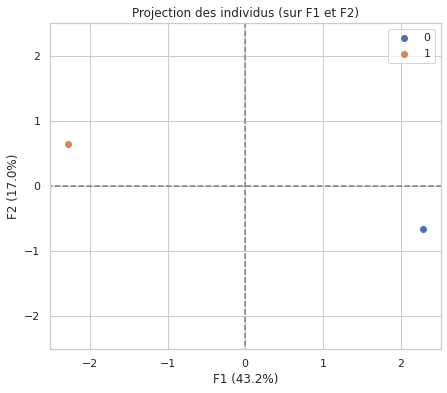

<Figure size 432x288 with 0 Axes>

In [747]:
#Centroides
X2 = df_cent.values
std_scale = preprocessing.StandardScaler().fit(X2)
X2_scaled = std_scale.transform(X2)

# Projection des centroïdes des clusters sur les deux composantes
X2_projected = pca.transform(X2_scaled)
display_factorial_planes(X2_projected, n_comp, pca, [(0,1)], illustrative_var=df_cent.index)
plt.savefig("centroid.png")
plt.show()

In [735]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

[0.43210378 0.60168351 0.73186852 0.85011358]


2 composantes sont suffisantes pour avoir au moins 60% de la variance.

## <a name="C27"><font color='LightSeaGreen'>Modélisation</font></a>

In [743]:
X = df_km.drop('nocl', axis=1)
y = df_km['nocl']
y

code_billet
b0       0
b1       1
b2       1
b3       1
b4       1
        ..
b1495    0
b1496    0
b1497    0
b1498    0
b1499    0
Name: nocl, Length: 1500, dtype: int32

In [744]:
from sklearn.model_selection import train_test_split
#random_state=42 est utilisé pour avoir le meme test set à chaque execution du code
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
y_test

code_billet
b1116    0
b1368    0
b422     1
b413     1
b451     1
        ..
b983     1
b799     1
b1265    0
b1150    0
b824     1
Name: nocl, Length: 300, dtype: int32

In [745]:
print(f"Forme de X_train : {X_train.shape} et forme de y_train : {y_train.shape}")
print(f"Forme de X_train : {X_test.shape} et forme de y_train : {y_test.shape}")

Forme de X_train : (1200, 6) et forme de y_train : (1200,)
Forme de X_train : (300, 6) et forme de y_train : (300,)
